In [1]:
import pandas as pd
import numpy as np

In [2]:
diamond = pd.read_csv("diamonds.csv")
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamond.shape

(53940, 11)

In [4]:
# Rename columns
diamond.rename(columns = {
    "carat": "weight",
    "x": "length",
    "y": "width",
    "z": "depth",
    "cut": "quality",
    "depth": "depth(percentage)"
}, inplace=True)

In [5]:
diamond.head()

,Unnamed: 0,weight,quality,color,clarity,depth(percentage),table,price,length,width,depth
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# Missing values
diamond.isna().sum()

Unnamed: 0           0
weight               0
quality              0
color                0
clarity              0
depth(percentage)    0
table                0
price                0
length               0
width                0
depth                0
dtype: int64

In [7]:
# Data information
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         53940 non-null  int64  
 1   weight             53940 non-null  float64
 2   quality            53940 non-null  object 
 3   color              53940 non-null  object 
 4   clarity            53940 non-null  object 
 5   depth(percentage)  53940 non-null  float64
 6   table              53940 non-null  float64
 7   price              53940 non-null  int64  
 8   length             53940 non-null  float64
 9   width              53940 non-null  float64
 10  depth              53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [8]:
# Summary statistics
diamond.describe(include="all")

,Unnamed: 0,weight,quality,color,clarity,depth(percentage),table,price,length,width,depth
count,53940.000000,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,26970.500000,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


## EDA

### 1. Countplots of the categorical data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

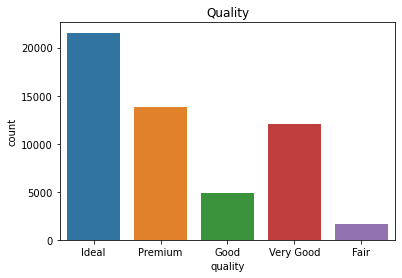

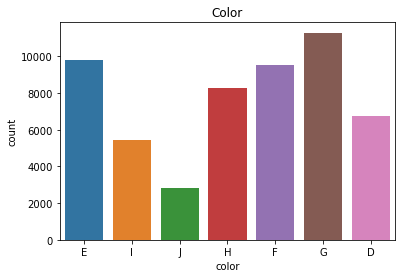

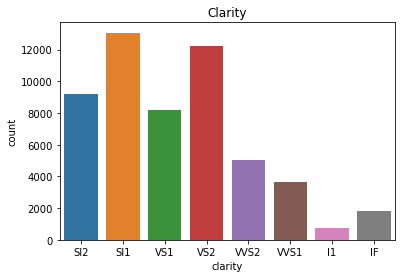

In [10]:
cols = ["quality", "color", "clarity"]

for col in cols:
    sns.countplot(x=col, data=diamond)
    plt.title(col.capitalize())
    plt.show()

In [11]:
diamond.head()

,Unnamed: 0,weight,quality,color,clarity,depth(percentage),table,price,length,width,depth
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 2. Barplots

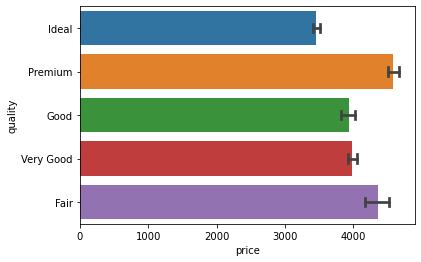

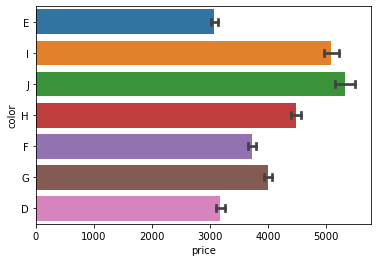

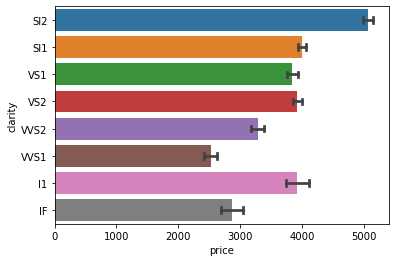

In [12]:
# How prices of each quality, color and clarity differ
cols = ["quality", "color", "clarity"]

for col in cols:
    sns.barplot(data=diamond, y=col, x="price", capsize=0.2)
    plt.show()

### 3. Scatterplots

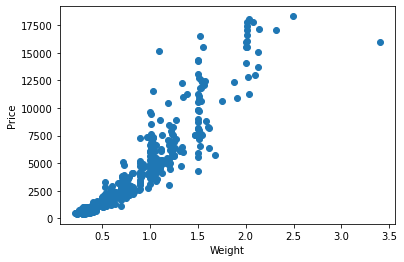

In [13]:
# Are weight and price correlated?
diamond_sample = diamond.sample(n = int(diamond.shape[0] * 0.0115))

plt.scatter(x=diamond_sample["weight"], y=diamond_sample["price"])
plt.xlabel("Weight")
plt.ylabel("Price")
plt.show()

## Predictions

### 1. Using `Ridge Regression`

Change categorical data to numerical data

In [18]:
diamond = pd.get_dummies(data=diamond, columns=["quality", "color", "clarity"])

In [19]:
diamond.head()

,Unnamed: 0,weight,depth(percentage),table,price,length,width,depth,quality_Fair,quality_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,...,0,1,0,0,0,1,0,0,0,0


**Baseline model**

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Set up random seed
np.random.seed(42)

# Create data
X = diamond.drop(columns=["Unnamed: 0", "price"])
y = diamond["price"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
clf = Ridge()

# Fit the model
clf.fit(X_train, y_train)

# Score
clf.score(X_test, y_test)

0.918937511828123

In [21]:
# Make predictions
y_preds = clf.predict(X_test)

In [22]:
print(y_test[:5], y_preds[:5])

1388      559
50052    2201
41645    1238
42377    1304
17244    6901
Name: price, dtype: int64 [ 707.84649952 3193.32229117 1947.17390709 2077.60514468 9877.56176404]


**Evaluating the model**

In [23]:
# Create an evaluation function
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_pred(y_test, y_pred):
    r2 = r2_score(y_test, y_pred) 
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    metrics = {
        "r2": round((r2 * 100), 2),
        "MAE": round(mae,2),
        "MSE": round(mse, 2)
    }
    
    return metrics

baseline_metrics = evaluate_pred(y_test, y_preds)
baseline_metrics

{'r2': 91.89, 'MAE': 737.41, 'MSE': 1288635.9}

**Improving the model**

We will scale the data then use the gridsearchcv.

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

# Create data
X = diamond.drop(columns=["Unnamed: 0", "price"])
y = diamond["price"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
ridge = Ridge()

# Instantiate the pipeline model
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("ridge", ridge)
])

# Grid of parameters
grid = {
    "ridge__alpha": np.arange(1,10)}

# Instantiate the GridSearchCV version of our model
gsv_clf_ridge = GridSearchCV(pipe, grid, cv=5)

# Fit the model 
gsv_clf_ridge.fit(X_train, y_train);

In [44]:
gsv_clf_ridge.best_params_

{'ridge__alpha': 9}

In [39]:
# Make predictions with it
gscv_ridge_pred = gsv_clf_ridge.predict(X_test)

# Evaluate it
gscv_ridge_metrics = evaluate_pred(y_test, gscv_ridge_pred)
gscv_ridge_metrics

{'r2': 91.89, 'MAE': 738.0, 'MSE': 1288609.63}

### 2. Using `Lasso Regression`

In [43]:
from sklearn.linear_model import Lasso

np.random.seed(42)

# Create data
X = diamond.drop(columns=["Unnamed: 0", "price"])
y = diamond["price"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
clf = Lasso()

# Fit the model
clf.fit(X_train, y_train)

# Score
clf.score(X_test, y_test)

0.9189706046286295

In [48]:
y_preds = clf.predict(X_test)

# Evaluate
lasso_metrics = evaluate_pred(y_test, y_preds)
lasso_metrics

{'r2': 91.9, 'MAE': 736.01, 'MSE': 1288109.83}

**Improving the Lasso model**

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

# Create data
X = diamond.drop(columns=["Unnamed: 0", "price"])
y = diamond["price"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
lasso = Lasso()

# Instantiate the pipeline model
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("lasso", lasso)
])

# Grid of parameters
grid = {
    "lasso__alpha": np.arange(1,10)}

# Instantiate the GridSearchCV version of our model
gsv_clf_lasso = GridSearchCV(pipe, grid, cv=5)

# Fit the model 
gsv_clf_lasso.fit(X_train, y_train);

In [50]:
# Make predictions with it
gscv_lasso_pred = gsv_clf_lasso.predict(X_test)

# Evaluate it
gscv_lasso_metrics = evaluate_pred(y_test, gscv_lasso_pred)
gscv_lasso_metrics

{'r2': 91.9, 'MAE': 737.84, 'MSE': 1288437.32}

### 3. Using `RandomForestRegressor`

In [40]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create data
X = diamond.drop(columns=["Unnamed: 0", "price"])
y = diamond["price"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
clf = RandomForestRegressor()

# Fit the model
clf.fit(X_train, y_train)

# Score
clf.score(X_test, y_test)

0.9808164717754314

In [41]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluation
regressor_metrics = evaluate_pred(y_test, y_pred)
regressor_metrics

{'r2': 98.08, 'MAE': 270.74, 'MSE': 304957.12}

In [51]:
metrics = pd.DataFrame({"ridge": baseline_metrics,
                       "grid_ridge": gscv_ridge_metrics,
                        "lasso": lasso_metrics,
                        "grid_lasso": gscv_lasso_metrics,
                       "random forest": regressor_metrics})
metrics

,ridge,grid_ridge,lasso,grid_lasso,random forest
r2,91.89,91.89,91.90,91.90,98.08
MAE,737.41,738.00,736.01,737.84,270.74
MSE,1288635.90,1288609.63,1288109.83,1288437.32,304957.12


Clearly `RandomForestRegressor` is better than the `Ridge Regression` and `Lasso Regression` in predicting since it has a higher accuracy score and a lower mean absolute error.